<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/OCT_analysis_age%2C_gender%2C_laterality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn

In [2]:
main_data = pd.ExcelFile('/content/drive/MyDrive/OCT analysis original dataset in hemodialysis patients thesis Dr Poojitha.xlsx')
main_data.sheet_names


['Patient-control demo (CKD-DM)',
 'Patient-control demo (CKD-HTN)',
 'Pre+post HD-VA,IOP,CCT-DM',
 'Pre+post HD-VA,IOP,CCT-HTN',
 'Pre+post HD-RNFL-DM',
 'Pre+post HD-CMT-DM',
 'Pre+post HD-VFA-DM']

In [3]:
dm_patients = pd.read_excel(main_data, 'Patient-control demo (CKD-DM)')
dm_patients.shape

(30, 10)

In [ ]:
dm_patients.columns

Index(['Age-DM', 'Males-DM', 'Females-DM', 'RE-DM', 'LE-DM', 'Age-Control(DM)',
       'Males-Control(DM)', 'Females-Control(DM)', 'RE-Control(DM)',
       'LE-Control(DM)'],
      dtype='object')

In [4]:
dm_control_age = dm_patients.drop(['Males-DM', 'Females-DM', 'RE-DM', 'LE-DM',
       'Males-Control(DM)', 'Females-Control(DM)', 'RE-Control(DM)',
       'LE-Control(DM)'], axis=1)
dm_control_age.columns

Index(['Age-DM', 'Age-Control(DM)'], dtype='object')

In [5]:
htn_patients = pd.read_excel(main_data, 'Patient-control demo (CKD-HTN)')
htn_patients.columns

Index(['Age-HTN', 'Males-HTN', 'Females-HTN', 'RE-HTN', 'LE-HTN',
       'Age-Control(HTN)', 'Males-Control(HTN)', 'Females-Control(HTN)',
       'RE-Control(HTN)', 'LE-Control(HTN)'],
      dtype='object')

In [6]:
htn_control_age = htn_patients.drop(['Males-HTN', 'Females-HTN', 'RE-HTN', 'LE-HTN',
       'Males-Control(HTN)', 'Females-Control(HTN)',
       'RE-Control(HTN)', 'LE-Control(HTN)'], axis=1)
htn_control_age.columns

Index(['Age-HTN', 'Age-Control(HTN)'], dtype='object')

In [7]:
age_dataset = pd.concat([dm_control_age, htn_control_age], axis=1)
age_dataset.columns

Index(['Age-DM', 'Age-Control(DM)', 'Age-HTN', 'Age-Control(HTN)'], dtype='object')

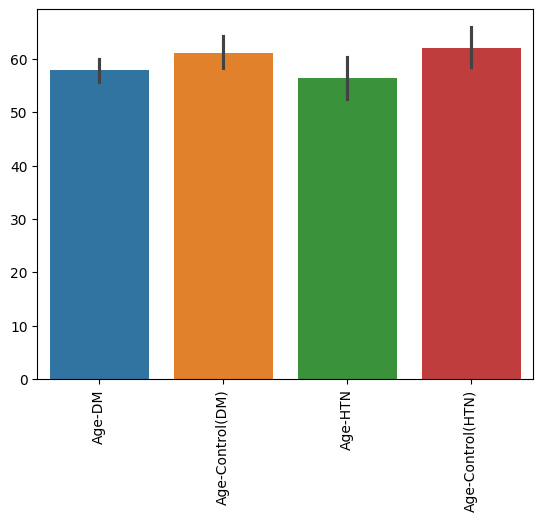

In [43]:
# prompt: barplot

import matplotlib.pyplot as plt
seaborn.barplot(data=age_dataset)
plt.xticks(rotation=90)
plt.show()


In [ ]:
age_dataset.describe()

,Age-DM,Age-Control(DM),Age-HTN,Age-Control(HTN)
count,24.000000,30.000000,28.000000,30.000000
mean,57.916667,61.133333,56.464286,62.100000
std,5.740146,8.818997,11.334909,11.030835
min,52.000000,49.000000,35.000000,42.000000
25%,53.750000,55.250000,50.000000,57.250000
50%,56.500000,59.000000,57.500000,61.000000
75%,59.500000,66.500000,65.000000,71.500000
max,69.000000,81.000000,74.000000,84.000000


In [ ]:
age_dataset.corr()

,Age-DM,Age-Control(DM),Age-HTN,Age-Control(HTN)
Age-DM,1.000000,0.221437,-0.145157,0.476860
Age-Control(DM),0.221437,1.000000,-0.550009,0.235932
Age-HTN,-0.145157,-0.550009,1.000000,-0.020705
Age-Control(HTN),0.476860,0.235932,-0.020705,1.000000


<Axes: >

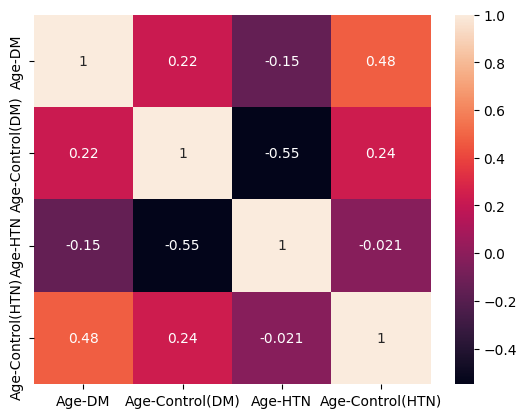

In [ ]:
seaborn.heatmap(age_dataset.corr(), annot=True)

<Axes: >

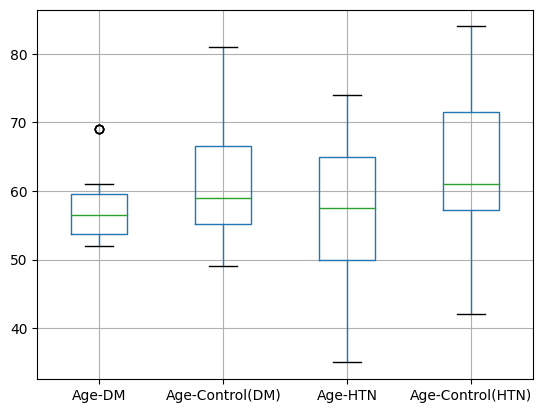

In [ ]:
age_dataset.boxplot()

<Axes: >

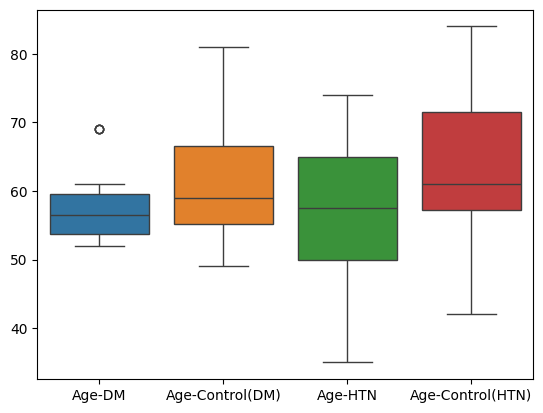

In [ ]:
seaborn.boxplot(age_dataset)

array([[<Axes: title={'center': 'Age-DM'}>,
        <Axes: title={'center': 'Age-Control(DM)'}>],
       [<Axes: title={'center': 'Age-HTN'}>,
        <Axes: title={'center': 'Age-Control(HTN)'}>]], dtype=object)

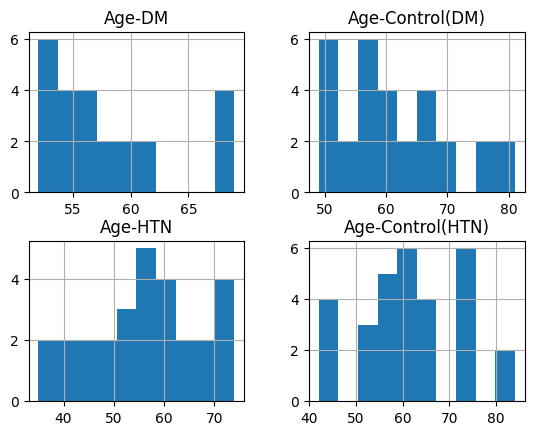

In [ ]:
age_dataset.hist()

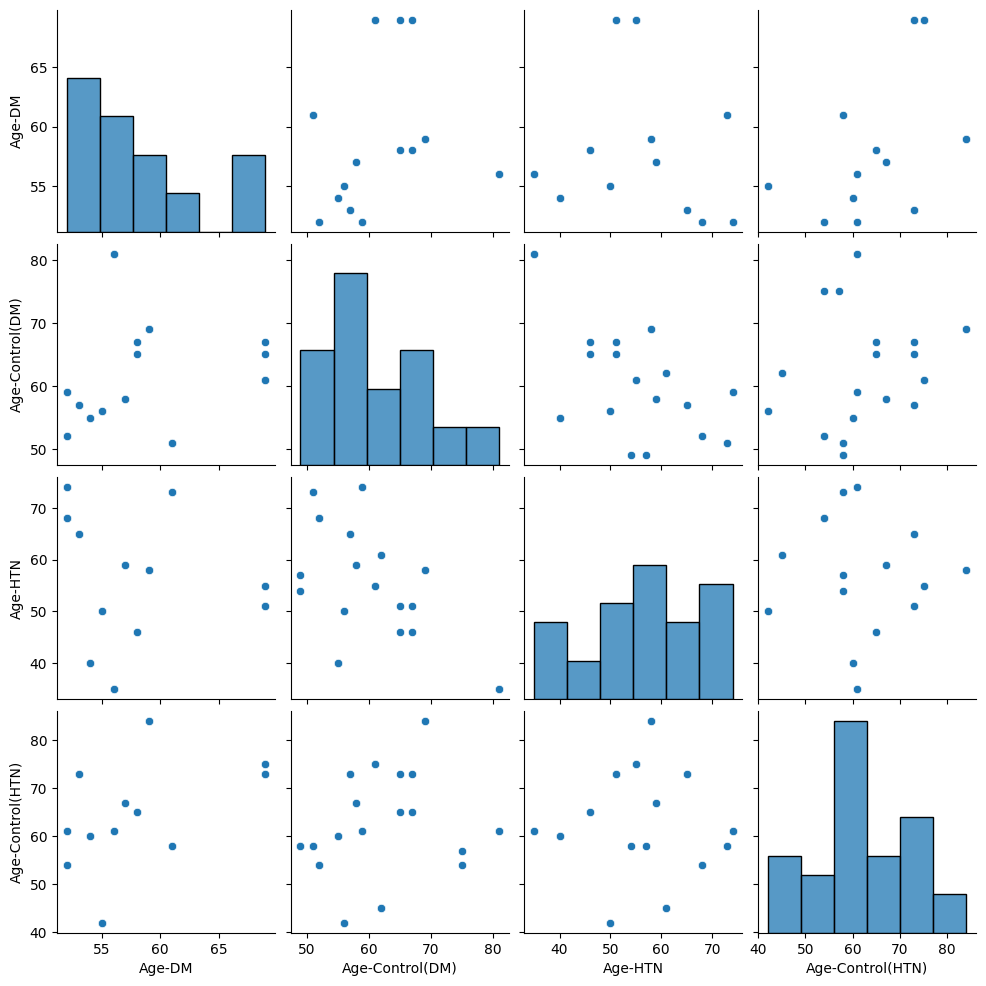

In [ ]:
seaborn.pairplot(age_dataset)

In [ ]:
main_data.sheet_names

['Patient-control demo (CKD-DM)',
 'Patient-control demo (CKD-HTN)',
 'Pre+post HD-VA,IOP,CCT-DM',
 'Pre+post HD-VA,IOP,CCT-HTN',
 'Pre+post HD-RNFL-DM',
 'Pre+post HD-CMT-DM',
 'Pre+post HD-VFA-DM']

In [8]:
dm_control_gender = dm_patients.drop(['Age-DM', 'RE-DM', 'LE-DM', 'Age-Control(DM)',
                                      'RE-Control(DM)','LE-Control(DM)'], axis=1)
dm_control_gender.columns


Index(['Males-DM', 'Females-DM', 'Males-Control(DM)', 'Females-Control(DM)'], dtype='object')

In [9]:
# prompt: Value counts

dm_control_gender['Males-DM'].value_counts(),dm_control_gender['Females-DM'].value_counts(),dm_control_gender['Males-Control(DM)'].value_counts(),dm_control_gender['Females-Control(DM)'].value_counts()


(Males-DM
 1.0    14
 0.0    10
 Name: count, dtype: int64,
 Females-DM
 0.0    14
 1.0    10
 Name: count, dtype: int64,
 Males-Control(DM)
 1    20
 0    10
 Name: count, dtype: int64,
 Females-Control(DM)
 0    20
 1    10
 Name: count, dtype: int64)

In [10]:
import scipy.stats as stats

# Define the contingency table
data = [[14, 20], [10, 20]]

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(data)

# Print the results
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi2 statistic: 0.15058823529411763
P-value: 0.6979738522659524
Degrees of freedom: 1
Expected frequencies:
[[12.75 21.25]
 [11.25 18.75]]


In [17]:
htn_control_gender = htn_patients.drop(['Age-HTN', 'RE-HTN', 'LE-HTN',
       'Age-Control(HTN)', 'RE-Control(HTN)',
       'LE-Control(HTN)'], axis=1)
htn_control_gender.columns

Index(['Males-HTN', 'Females-HTN', 'Males-Control(HTN)',
       'Females-Control(HTN)'],
      dtype='object')

In [11]:
dm_patients.columns

Index(['Age-DM', 'Males-DM', 'Females-DM', 'RE-DM', 'LE-DM', 'Age-Control(DM)',
       'Males-Control(DM)', 'Females-Control(DM)', 'RE-Control(DM)',
       'LE-Control(DM)'],
      dtype='object')

In [12]:
htn_patients.columns

Index(['Age-HTN', 'Males-HTN', 'Females-HTN', 'RE-HTN', 'LE-HTN',
       'Age-Control(HTN)', 'Males-Control(HTN)', 'Females-Control(HTN)',
       'RE-Control(HTN)', 'LE-Control(HTN)'],
      dtype='object')

In [18]:
# prompt: Value counts

htn_control_gender['Males-HTN'].value_counts(),htn_control_gender['Females-HTN'].value_counts(),htn_control_gender['Males-Control(HTN)'].value_counts(),htn_control_gender['Females-Control(HTN)'].value_counts()


(Males-HTN
 0.0    15
 1.0    13
 Name: count, dtype: int64,
 Females-HTN
 1.0    15
 0.0    13
 Name: count, dtype: int64,
 Males-Control(HTN)
 1    17
 0    13
 Name: count, dtype: int64,
 Females-Control(HTN)
 0    17
 1    13
 Name: count, dtype: int64)

In [19]:
import scipy.stats as stats

# Define the contingency table
data = [[13, 17], [15, 13]]

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(data)

# Print the results
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi2 statistic: 0.267066326530612
P-value: 0.6053065289578156
Degrees of freedom: 1
Expected frequencies:
[[14.48275862 15.51724138]
 [13.51724138 14.48275862]]


In [24]:
chi_test_gender = pd.concat([dm_control_gender, htn_control_gender], axis=1)
chi_test_gender.columns



Index(['Males-DM', 'Females-DM', 'Males-Control(DM)', 'Females-Control(DM)',
       'Males-HTN', 'Females-HTN', 'Males-Control(HTN)',
       'Females-Control(HTN)'],
      dtype='object')

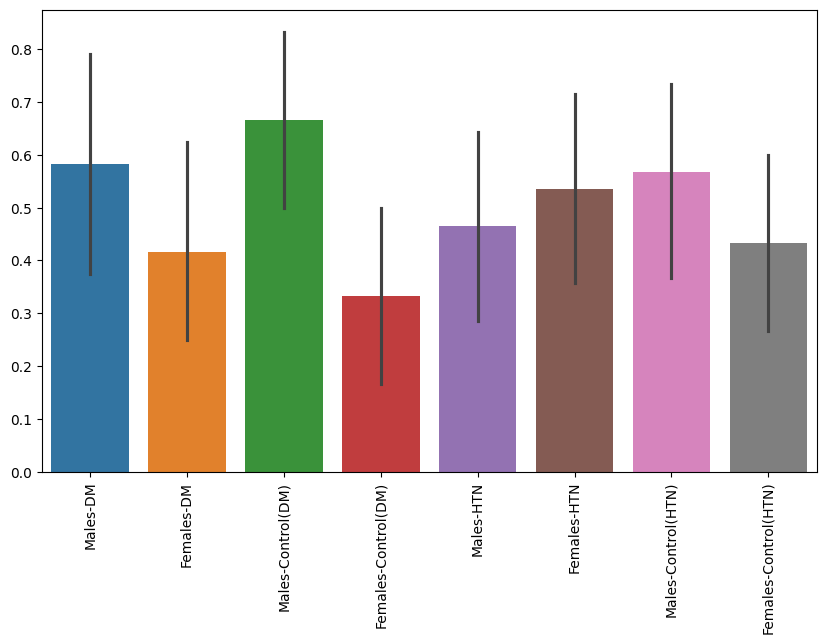

In [41]:
# prompt: barplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
seaborn.barplot(data=chi_test_gender)
plt.xticks(rotation=90)
plt.show()


In [25]:
# prompt: Value counts

chi_test_gender['Males-DM'].value_counts(), chi_test_gender['Females-DM'].value_counts(), chi_test_gender['Males-Control(DM)'].value_counts(), chi_test_gender['Females-Control(DM)'].value_counts(), chi_test_gender['Males-HTN'].value_counts(), chi_test_gender['Females-HTN'].value_counts(), chi_test_gender['Males-Control(HTN)'].value_counts(), chi_test_gender['Females-Control(HTN)'].value_counts()


(Males-DM
 1.0    14
 0.0    10
 Name: count, dtype: int64,
 Females-DM
 0.0    14
 1.0    10
 Name: count, dtype: int64,
 Males-Control(DM)
 1    20
 0    10
 Name: count, dtype: int64,
 Females-Control(DM)
 0    20
 1    10
 Name: count, dtype: int64,
 Males-HTN
 0.0    15
 1.0    13
 Name: count, dtype: int64,
 Females-HTN
 1.0    15
 0.0    13
 Name: count, dtype: int64,
 Males-Control(HTN)
 1    17
 0    13
 Name: count, dtype: int64,
 Females-Control(HTN)
 0    17
 1    13
 Name: count, dtype: int64)

In [29]:
import scipy.stats as stats

# Define the contingency table
data = [[14, 13, 20, 17],
        [10, 15, 10, 13]]

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(data)

# Print the results
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi2 statistic: 2.440277777777778
P-value: 0.4861809683325261
Degrees of freedom: 3
Expected frequencies:
[[13.71428571 16.         17.14285714 17.14285714]
 [10.28571429 12.         12.85714286 12.85714286]]


In [46]:
laterality_dm_data = dm_patients.drop(['Age-DM', 'Males-DM', 'Females-DM', 'Age-Control(DM)',
       'Males-Control(DM)', 'Females-Control(DM)'], axis=1)
laterality_dm_data.columns

Index(['RE-DM', 'LE-DM', 'RE-Control(DM)', 'LE-Control(DM)'], dtype='object')

In [50]:
laterality_htn_data = htn_patients.drop(['Age-HTN', 'Males-HTN', 'Females-HTN',
       'Age-Control(HTN)', 'Males-Control(HTN)', 'Females-Control(HTN)'], axis=1)
laterality_htn_data.columns


Index(['RE-HTN', 'LE-HTN', 'RE-Control(HTN)', 'LE-Control(HTN)'], dtype='object')

In [53]:
laterality_dataset = pd.concat([laterality_dm_data, laterality_htn_data], axis=1)
laterality_dataset.columns



Index(['RE-DM', 'LE-DM', 'RE-Control(DM)', 'LE-Control(DM)', 'RE-HTN',
       'LE-HTN', 'RE-Control(HTN)', 'LE-Control(HTN)'],
      dtype='object')

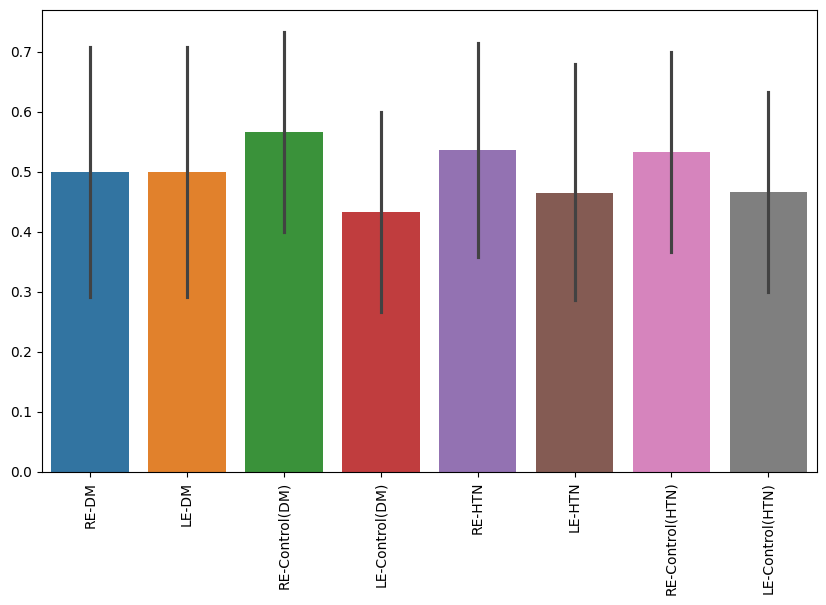

In [56]:
# prompt: barplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
seaborn.barplot(data=laterality_dataset)
plt.xticks(rotation=90)
plt.show()


In [57]:
# prompt: Value counts

laterality_dataset['RE-DM'].value_counts(), laterality_dataset['LE-DM'].value_counts(), laterality_dataset['RE-Control(DM)'].value_counts(), laterality_dataset['LE-Control(DM)'].value_counts(), laterality_dataset['RE-HTN'].value_counts(), laterality_dataset['LE-HTN'].value_counts(), laterality_dataset['RE-Control(HTN)'].value_counts(), laterality_dataset['LE-Control(HTN)'].value_counts()


(RE-DM
 1.0    12
 0.0    12
 Name: count, dtype: int64,
 LE-DM
 0.0    12
 1.0    12
 Name: count, dtype: int64,
 RE-Control(DM)
 1    17
 0    13
 Name: count, dtype: int64,
 LE-Control(DM)
 0    17
 1    13
 Name: count, dtype: int64,
 RE-HTN
 1.0    15
 0.0    13
 Name: count, dtype: int64,
 LE-HTN
 0.0    15
 1.0    13
 Name: count, dtype: int64,
 RE-Control(HTN)
 1    16
 0    14
 Name: count, dtype: int64,
 LE-Control(HTN)
 0    16
 1    14
 Name: count, dtype: int64)

In [58]:
import scipy.stats as stats

# Define the contingency table
data = [[12, 17, 15, 16],
        [12, 13, 13, 14]]

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(data)

# Print the results
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi2 statistic: 0.2393162393162393
P-value: 0.9710058166434837
Degrees of freedom: 3
Expected frequencies:
[[12.85714286 16.07142857 15.         16.07142857]
 [11.14285714 13.92857143 13.         13.92857143]]


In [47]:
htn_patients.columns

Index(['Age-HTN', 'Males-HTN', 'Females-HTN', 'RE-HTN', 'LE-HTN',
       'Age-Control(HTN)', 'Males-Control(HTN)', 'Females-Control(HTN)',
       'RE-Control(HTN)', 'LE-Control(HTN)'],
      dtype='object')

In [44]:
dm_patients.columns

Index(['Age-DM', 'Males-DM', 'Females-DM', 'RE-DM', 'LE-DM', 'Age-Control(DM)',
       'Males-Control(DM)', 'Females-Control(DM)', 'RE-Control(DM)',
       'LE-Control(DM)'],
      dtype='object')